In [38]:
library(ggplot2)
library(gridExtra)
library(matrixStats)
library(dplyr)
library(reshape2)
library(clusterCrit)
library(grid)
library(ggrepel)
library(RColorBrewer)
library(dplyr)
library(IRdisplay)
library(scales)
library(survival)
library(corrplot)
library(Hmisc)
library(dummies)
source('../../../src/tools.R')     # custom tools function
source('../../../src/hdp_tools_yanis.R')
source("../../../src/merge_df.R")
source("../../../src/my_toolbox.R")
source("../../../src/my_components.R")
source("../../../src/my_utils.R")
source("../../../src/ggstyles.R")
source("../../../src/my_hotspots.R")
###


theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

# Useful functions and preparations

In [2]:
correlates <- c("gender","age","ahd","perf_status","bm_blasts","secondary","wbc","hb","plt","os","cr","os_status","cod")
binary_correlates <- c("gender","ahd","perf_status","secondary","os_status","cr")
continuous_correlates <- c("age","wbc","hb","plt","bm_blasts","os","cod")
val=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                      "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                      "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                      "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink")

In [3]:
plottings_comparison <-function(df1,df2=NULL,df3=NULL,df4=NULL,df5=NULL,df6=NULL,x1="", x2="",x3="",x4="",x5="",x6="",many=2,width=8,height=2){
        
    cat (paste(paste("Count",x1,sep=" : "),toString(dim(df1)[1]),sep=" : "),"\n")
    cat (paste(paste("Count",x2,sep=" : "),toString(dim(df2)[1]),sep=" : "),"\n")    
    if(many>=3){cat(paste(paste("Count",x3,sep=" : "),toString(dim(df3)[1]),sep=" : "),"\n")}
    if(many>=4){cat(paste(paste("Count",x4,sep=" : "),toString(dim(df4)[1]),sep=" : "),"\n")}
    if(many>=5){cat(paste(paste("Count",x5,sep=" : "),toString(dim(df5)[1]),sep=" : "),"\n")}
    if(many>=6){cat(paste(paste("Count",x6,sep=" : "),toString(dim(df6)[1]),sep=" : "),"\n")}
    
    vals=c("0" = "grey45", "1" = "#e79f00", "2" = "#009E73", "3" ="#0072B2", "4"="#CC79A7")
    set_notebook_plot_size(width,height)
    theme_1 = theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
    
    for (col in binary_correlates){ 
        p1 <-ggplot(df1, aes(factor(comparison), fill = factor(df1[,col]))) + 
            geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x1,fill=col)+
            scale_fill_manual(values = vals) + theme_1
        if (many==1){
            plot(p1)
        }else if (many==2){
            p2 <-ggplot(df2, aes(factor(comparison), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            grid.arrange(p1,p2,nrow=1)
        }else if (many==3){
            p2 <-ggplot(df2, aes(factor(comparison), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p3 <-ggplot(df3, aes(factor(comparison), fill = factor(df3[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x3,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            grid.arrange(p1,p2,p3,nrow=1)
        }else if (many==4){
            p2 <-ggplot(df2, aes(factor(comparison), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+xlab(x2)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p3 <-ggplot(df3, aes(factor(comparison), fill = factor(df3[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x3,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p4 <-ggplot(df4, aes(factor(comparison), fill = factor(df4[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x4,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            grid.arrange(p1,p2,p3,p4,nrow=1)
        }
    }
    for (col in continuous_correlates){
        mini=suppressWarnings(min(min(df1[,col],na.rm=T),min(df2[,col],na.rm=T),min(df3[,col],na.rm=T),min(df4[,col],na.rm=T),na.rm=T))
        maxi=suppressWarnings(max(max(df1[,col],na.rm=T),max(df2[,col],na.rm=T),max(df3[,col],na.rm=T),max(df4[,col],na.rm=T),na.rm=T))
 
        p1 <- ggplot(df1,aes(x=factor(comparison),y=df1[,col],fill=comparison)) +
                geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x1)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
        if (many==1){
            suppressWarnings(plot(p1))
        }else if(many==2){
            p2 <- ggplot(df2,aes(x=factor(comparison),y=df2[,col],fill=comparison)) +
                    geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,nrow=1))
        }else if(many==3){
            p2 <- ggplot(df2,aes(x=factor(comparison),y=df2[,col],fill=comparison)) +
                    geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p3 <- ggplot(df3,aes(x=factor(comparison),y=df3[,col],fill=comparison)) +
                    geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x3)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,p3,nrow=1))
        }else if(many==4){
            p2 <- ggplot(df2,aes(x=factor(comparison),y=df2[,col],fill=comparison)) +
                    geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p3 <- ggplot(df3,aes(x=factor(comparison),y=df3[,col],fill=comparison)) +
                    geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x3)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p4 <- ggplot(df4,aes(x=factor(comparison),y=df4[,col],fill=comparison)) +
                    geom_boxplot(aes(fill = factor(comparison))) +  ylab(col)+xlab(x4)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,p3,p4,nrow=1))
        }
    }
}

In [4]:
plottings <-function(df1,df2=NULL,df3=NULL,df4=NULL,df5=NULL,df6=NULL,x1="with NPM1", x2="without NPM1",x3="",x4="",x5="",x6="",many=2,width=8,height=2){
    cat (paste(paste("Count",x1,sep=" : "),toString(dim(df1)[1]),sep=" : "),"\n")
    cat (paste(paste("Count",x2,sep=" : "),toString(dim(df2)[1]),sep=" : "),"\n")    
    if(many>=3){cat(paste(paste("Count",x3,sep=" : "),toString(dim(df3)[1]),sep=" : "),"\n")}
    if(many>=4){cat(paste(paste("Count",x4,sep=" : "),toString(dim(df4)[1]),sep=" : "),"\n")}
    if(many>=5){cat(paste(paste("Count",x5,sep=" : "),toString(dim(df5)[1]),sep=" : "),"\n")}
    if(many>=6){cat(paste(paste("Count",x6,sep=" : "),toString(dim(df6)[1]),sep=" : "),"\n")}
    
    vals=c("0" = "grey45", "1" = "#e79f00", "2" = "#009E73", "3" ="#0072B2", "4"="#CC79A7")
    set_notebook_plot_size(width,height)
    theme_1 = theme(axis.text.x = element_blank(),axis.ticks.x = element_blank())
    
    for (col in binary_correlates){ 
        p1 <-ggplot(df1, aes(factor(final_component), fill = factor(df1[,col]))) + 
            geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x1,fill=col)+
            scale_fill_manual(values = vals) + theme_1  # set ymin to 0 (Elli's request)
        
        if (many==1){
            plot(p1)
        }else if (many==2){
            p2 <-ggplot(df2, aes(factor(final_component), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1 
            grid.arrange(p1,p2,nrow=1)
        }else if (many==3){
            p2 <-ggplot(df2, aes(factor(final_component), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p3 <-ggplot(df3, aes(factor(final_component), fill = factor(df3[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x3,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            grid.arrange(p1,p2,p3,nrow=1)
        }else if (many==4){
            p2 <-ggplot(df2, aes(factor(final_component), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+xlab(x2)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p3 <-ggplot(df3, aes(factor(final_component), fill = factor(df3[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x3,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p4 <-ggplot(df4, aes(factor(final_component), fill = factor(df4[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x4,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            grid.arrange(p1,p2,p3,p4,nrow=1)
        }else if (many==5){
            p2 <-ggplot(df2, aes(factor(final_component), fill = factor(df2[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+xlab(x2)+labs(x=x2,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p3 <-ggplot(df3, aes(factor(final_component), fill = factor(df3[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x3,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p4 <-ggplot(df4, aes(factor(final_component), fill = factor(df4[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x4,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            p5 <-ggplot(df5, aes(factor(final_component), fill = factor(df5[,col]))) + 
                geom_bar(position = "fill") +scale_y_continuous(labels = scales::percent)+labs(x=x5,fill=col)+
                scale_fill_manual(values = vals) + theme_1
            grid.arrange(p1,p2,p3,p4,p5,nrow=1)
        }
    }
    for (col in continuous_correlates){
        mini=suppressWarnings(min(min(df1[,col],na.rm=T),min(df2[,col],na.rm=T),min(df3[,col],na.rm=T),min(df4[,col],na.rm=T),na.rm=T))
        maxi=suppressWarnings(max(max(df1[,col],na.rm=T),max(df2[,col],na.rm=T),max(df3[,col],na.rm=T),max(df4[,col],na.rm=T),na.rm=T))
 
        p1 <- ggplot(df1,aes(x=factor(final_component),y=df1[,col],fill=final_component)) +
                geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x1)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
        if (many==1){
            suppressWarnings(plot(p1))
        }else if(many==2){
            p2 <- ggplot(df2,aes(x=factor(final_component),y=df2[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,nrow=1))
        }else if(many==3){
            p2 <- ggplot(df2,aes(x=factor(final_component),y=df2[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p3 <- ggplot(df3,aes(x=factor(final_component),y=df3[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x3)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,p3,nrow=1))
        }else if(many==4){
            p2 <- ggplot(df2,aes(x=factor(final_component),y=df2[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p3 <- ggplot(df3,aes(x=factor(final_component),y=df3[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x3)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p4 <- ggplot(df4,aes(x=factor(final_component),y=df4[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x4)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,p3,p4,nrow=1))
        }else if(many==5){
            p2 <- ggplot(df2,aes(x=factor(final_component),y=df2[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x2)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p3 <- ggplot(df3,aes(x=factor(final_component),y=df3[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x3)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            p4 <- ggplot(df4,aes(x=factor(final_component),y=df4[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x4)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00"))
            p5 <- ggplot(df5,aes(x=factor(final_component),y=df5[,col],fill=final_component)) +
                    geom_boxplot(aes(fill = factor(final_component))) +  ylab(col)+xlab(x5)+ylim(mini,maxi) + theme_1 + scale_fill_manual(values=c("grey45","#e79f00")) 
            suppressWarnings(grid.arrange(p1,p2,p3,p4,p5,nrow=1))
        }
    }
}

In [5]:
plot_surv <-function(df_surv,title="",width=15,height=6,vals=val){
    set_notebook_plot_size(width,height)
    surv_object <- Surv(time = df_surv$os, event = df_surv$os_status)
    fit1 <- survfit(surv_object ~ comparison, data = df_surv)
    ggsurvplot(fit1, data = df_surv, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
    risk.table.y.text.col = T,
    risk.table.y.text = T,break.time.by = 1,title= title,palette=as.vector(vals[1:length(unique(df_surv$comparison))]))
}

In [6]:
### Dataframe preparation
df_all_components <- read.table("../../../data/updated_dataset/refined_components_updated.tsv",sep = '\t' , header = T)
df_initial <- read.table("../../../data/initial_dataset/Master_04_10_2019.csv",sep = ',' , header = T)
rownames(df_initial) <- df_initial$data_pd
df_initial <- df_initial[,-1:-4]

In [7]:
### Table prepapration with count of each contributors for each component
cols_to_keep = c(1:150,155,156,161)
tmp_cat <- as.data.frame(sapply(df_all_components[,cols_to_keep], as.numeric))
categories_repartition <- data.frame(category = colnames(tmp_cat[1:(length(tmp_cat)-1)]))
for (i in 1:length(levels(factor(df_all_components$final_component))))
    categories_repartition[levels(factor(df_all_components$final_component))[i]] <- apply(categories_repartition, 1, function(s) sum(tmp_cat[tmp_cat$final_component_numeric == i, s['category']]))
categories_repartition['total_count'] <- rowSums(categories_repartition[,-1])

In [8]:
# Useful function for main contributors
main_contributors_analysis <- function(component_name,threshold=0.2,many=3,width=6.5,height=2,plot="yes"){
    cat(paste("Numer of patients in this component : ",dim(df_all_components[df_all_components$final_component==component_name,])[1]),"\n")
    cat(paste("Table with the most frequent features for this component in decreasing order :"),"\n")
    tmp <-categories_repartition[categories_repartition[,component_name]>=threshold*dim(df_all_components[df_all_components$final_component==component_name,])[1],c("category",component_name)]
    print(tmp[order(tmp[,component_name],decreasing=T),])
    cat("\n\n")
    df_nc_1 <- merge(df_w_correlates,df_all_components[,levels(factor(tmp$category))],by=0)
    rownames(df_nc_1) <- df_nc_1$Row.names
    df_nc_1 <- df_nc_1 [,-1]
    df_nc_1$sum_contributors <- rowSums(df_nc_1[,levels(factor(tmp$category))])

    ### Compare clinical correlates based on how many contributors are present:
    df_nc_1$comparison <- ifelse(df_nc_1$final_component==component_name & df_nc_1$sum_contributors >=2 ,"with_2++contributors",
                          ifelse(df_nc_1$final_component==component_name & df_nc_1$sum_contributors ==1 ,"with_1contributor",
                          ifelse(df_nc_1$final_component==component_name & df_nc_1$sum_contributors ==0 ,"with_0contributor","other components")))
    if (plot=="yes"){
        plottings_comparison(df_nc_1[df_nc_1$comparison=="with_2++contributors",],
                         df_nc_1[df_nc_1$comparison=="with_1contributor",],
                         df_nc_1[df_nc_1$comparison=="with_0contributor",],x1="2++contributors",x2="1 contributor",x3="0contributor",many=many,width=width,height=height)  
        }
    return (df_nc_1)
}

# Eva Complex Analysis

In [9]:
df_w_correlates <- merge(df_initial[correlates],df_all_components['final_component'],by=0)
rownames(df_w_correlates) <- df_w_correlates$Row.names
df_w_correlates <- df_w_correlates [,-1]

[1] 2094   16

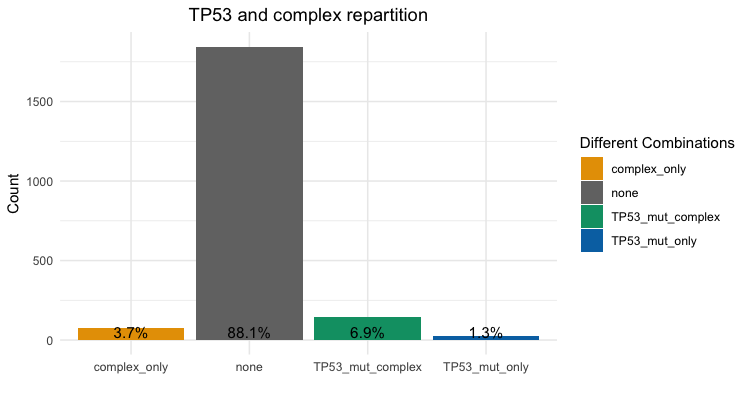

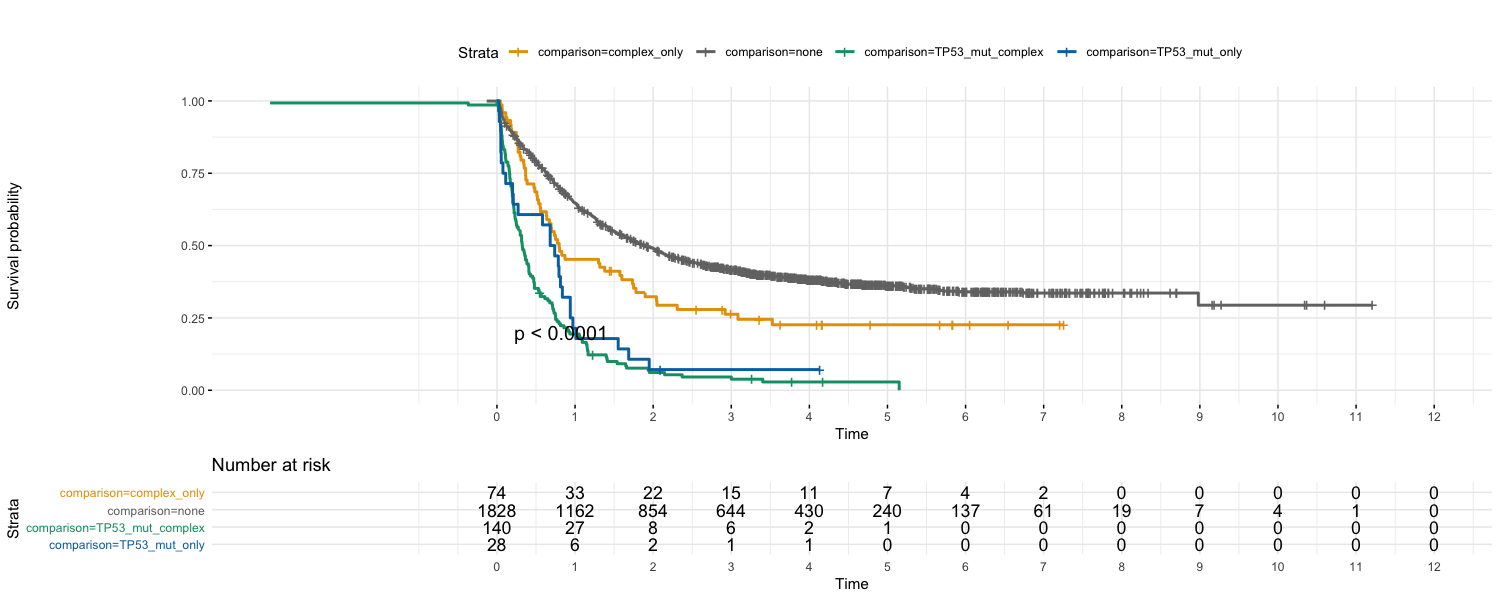

In [14]:
k <- df_all_components
k$comparison <- ifelse(k$TP53==1 & k$complex==1,"TP53_mut_complex",
                ifelse(k$TP53==1 & k$complex==0,"TP53_mut_only",
                ifelse(k$TP53==0 & k$complex==1,"complex_only","none")))
set_notebook_plot_size(7.5,4)
ggplot(k, aes(x = factor(comparison), fill = factor(k$comparison))) + 
                geom_bar(stat='count')+geom_text(aes(y = ((..count..)/sum(..count..)), label = scales::percent((..count..)/sum(..count..))), stat = "count", vjust = -0.25)+
scale_fill_manual(values = c("#e79f00","grey45", "#009E73","#0072B2"))+
scale_y_continuous() +
labs(x = "",title="TP53 and complex repartition",fill="Different Combinations",y="Count")+
theme(plot.title = element_text(hjust = 0.5))
tmp <- merge(df_w_correlates,k[,c('comparison','TP53')],by=0)
rownames(tmp) <- tmp$Row.names
tmp <- tmp [,-1]
dim(tmp)
#plottings_comparison(tmp[tmp$comparison=="TP53_mut_complex",],tmp[tmp$comparison=="TP53_mut_only",],tmp[tmp$comparison=="complex_only",],tmp[tmp$comparison=="none",],
 #                    many=4,x1="TP53_mut_complex",x2="TP53_mut_only",x3="complex_only",x4="none",width=11,height=2)
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
plot_surv(tmp,vals=c("#e79f00","grey45", "#009E73","#0072B2",title="Different Combinations of TP53 and complex survival"))



In [17]:
df_w_splicing <- merge(df_w_correlates[,c('os','os_status')],df_all_components[is.element(df_all_components$final_component,c("NC1","NC2","NC3","NC_splicing","NC6")),],by=0)
rownames(df_w_splicing) <- df_w_splicing$Row.names
df_w_splicing <- df_w_splicing [,-1]
second_proba <- read.table("../../clustering/finalization_clustering/second_proba_new_components.tsv")
df_w_splicing <- merge(df_w_splicing,second_proba[,c('init_predicted','second_predicted'),drop=FALSE],by=0)
rownames(df_w_splicing) <- df_w_splicing$Row.names
df_w_splicing <- df_w_splicing[,-1]

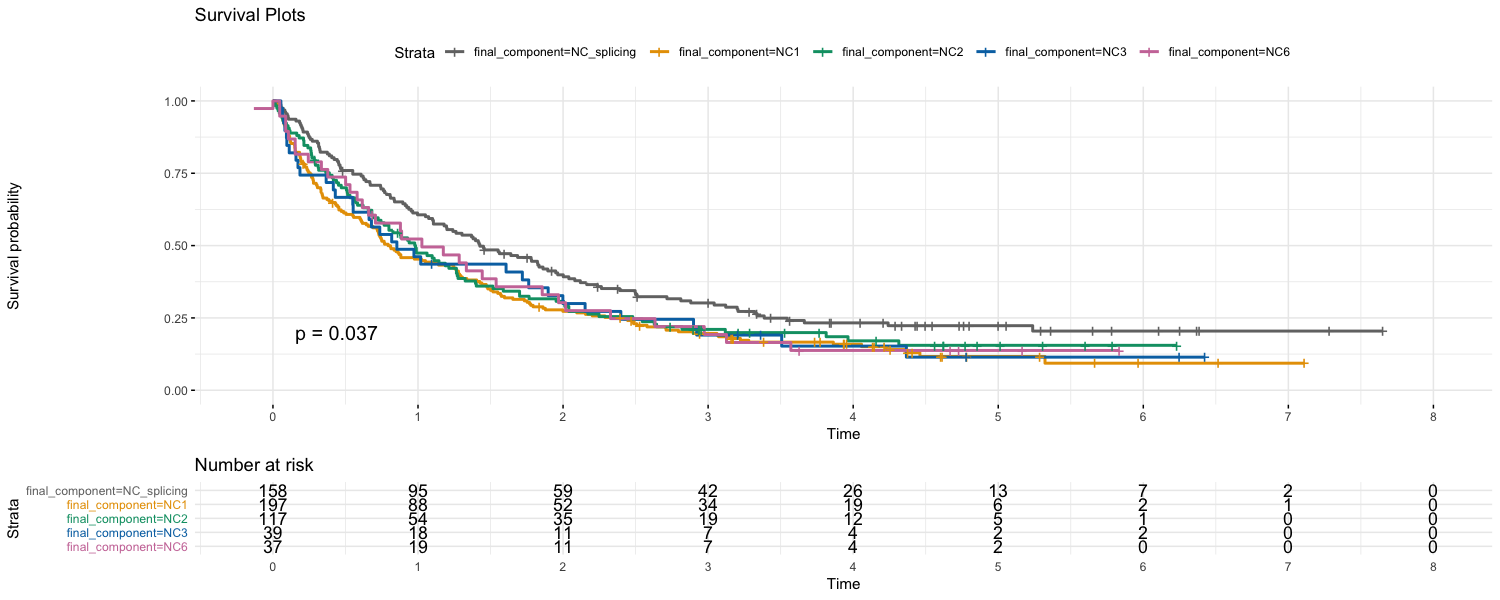

In [18]:
val1=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                      "lightgoldenrod", "#D55E00","white","mistyrose4", 
                                      "darkseagreen","lightsalmon","#F0E442",
                                      "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink")
surv1_object <- Surv(time = df_w_splicing$os, event = df_w_splicing$os_status)
fit2 <- survfit(surv1_object ~ final_component, data = df_w_splicing)
ggsurvplot(fit2, data = df_w_splicing, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(df_w_splicing$final_component))]))


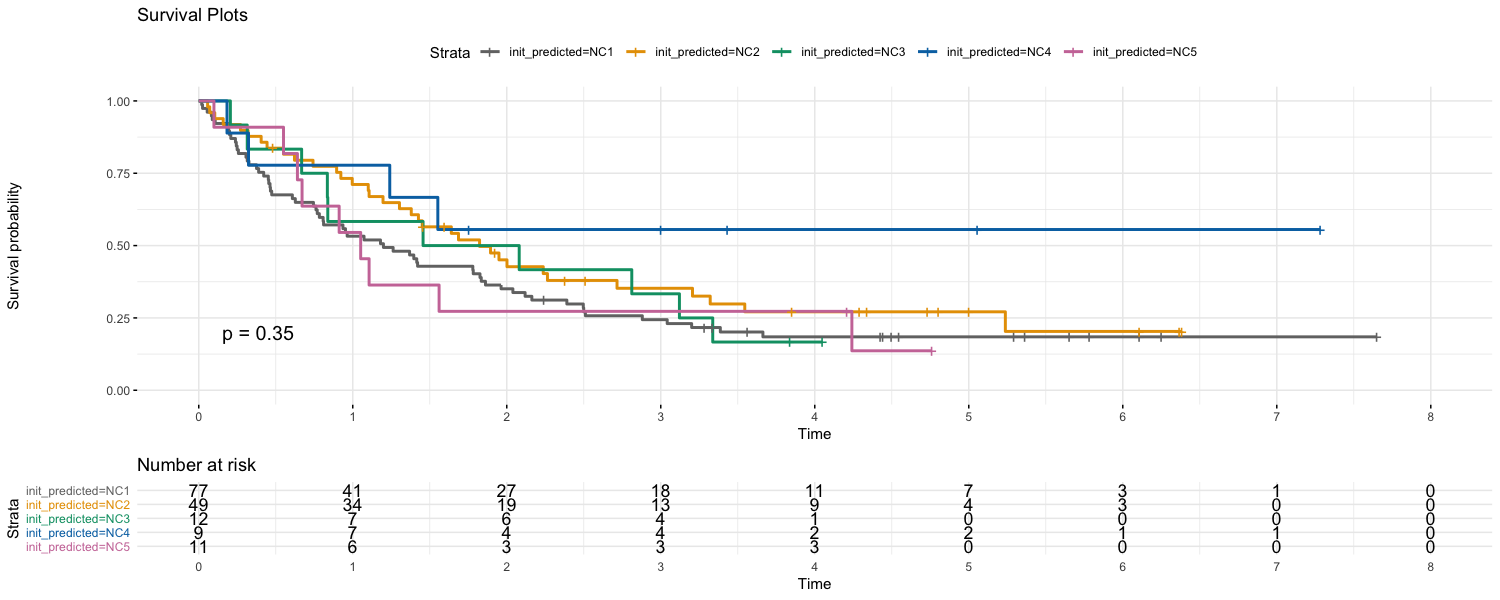

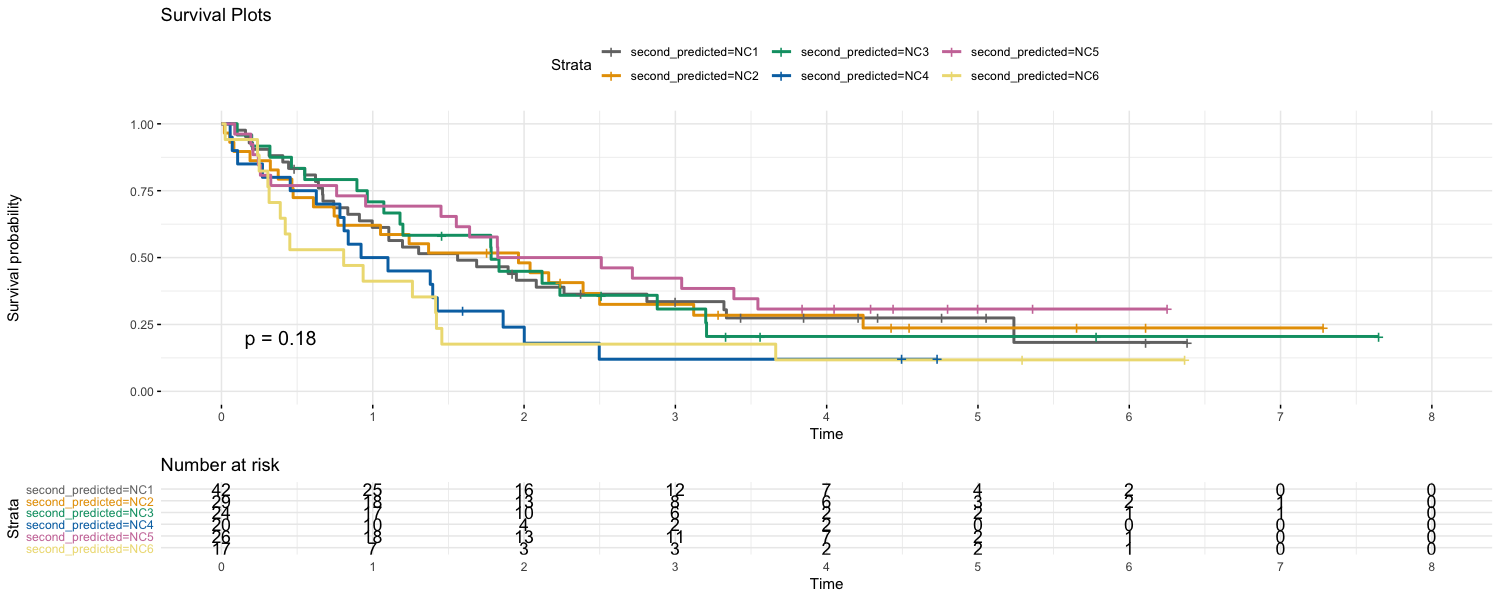

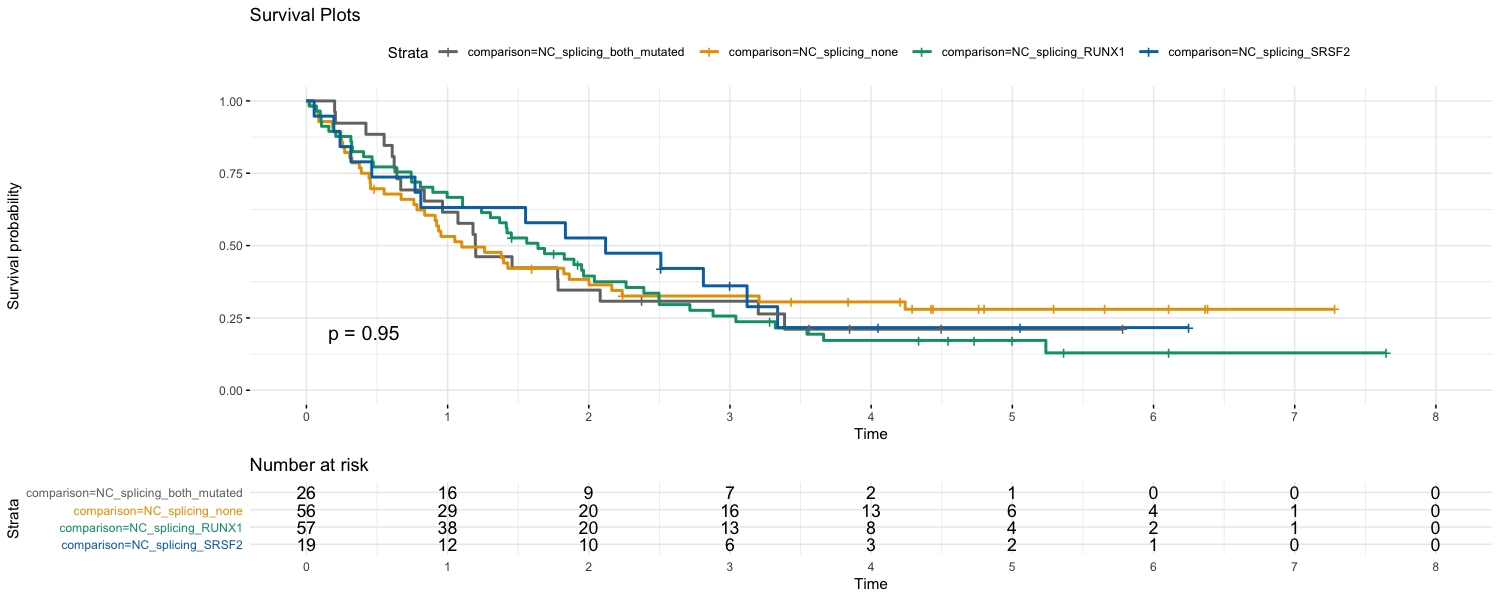

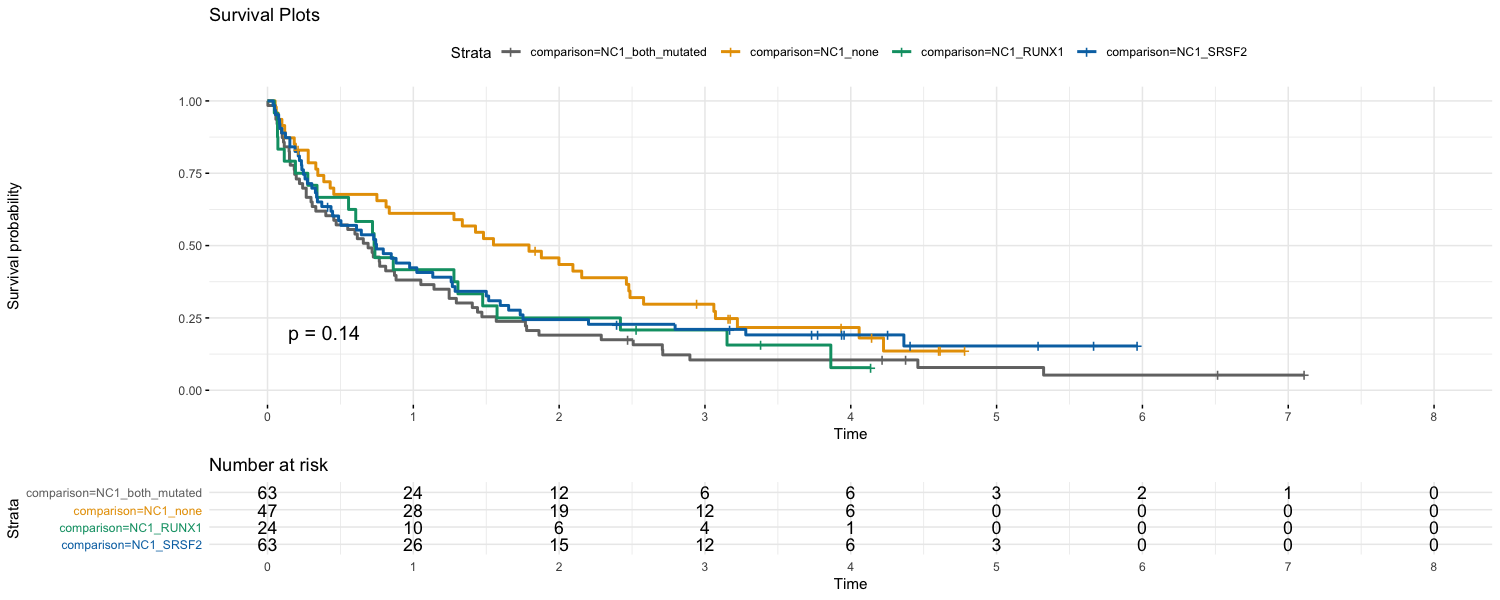

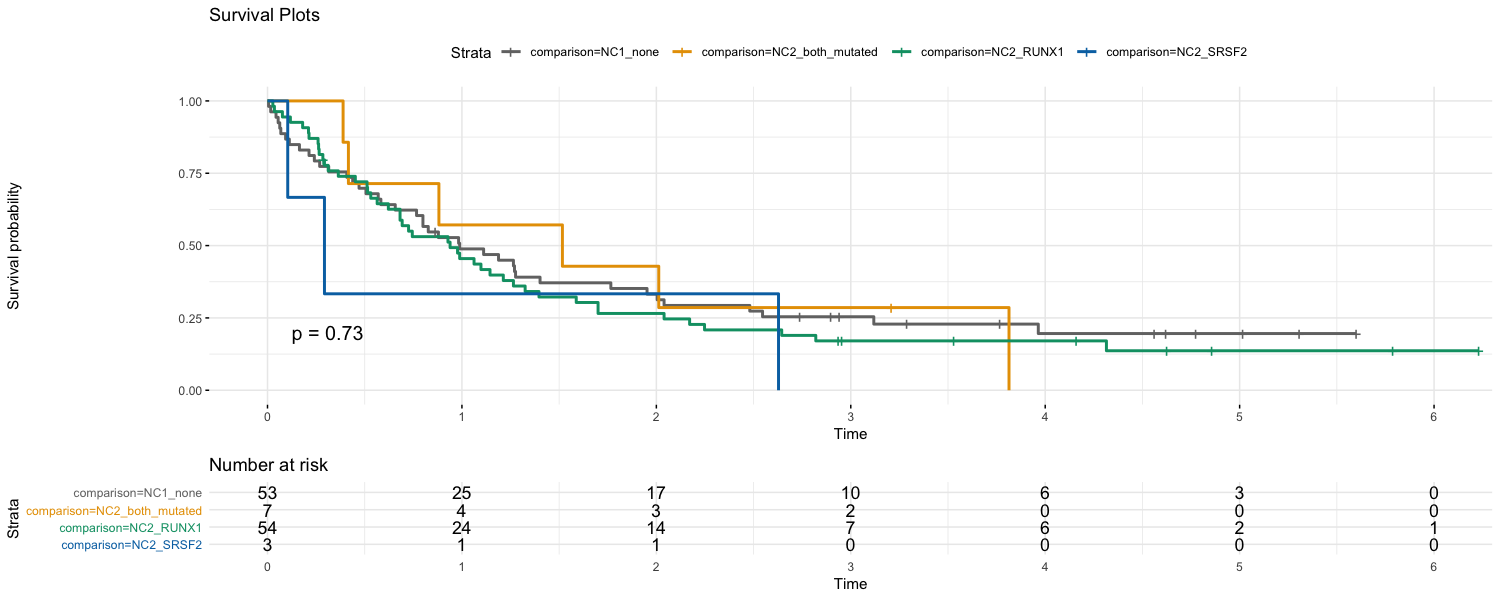

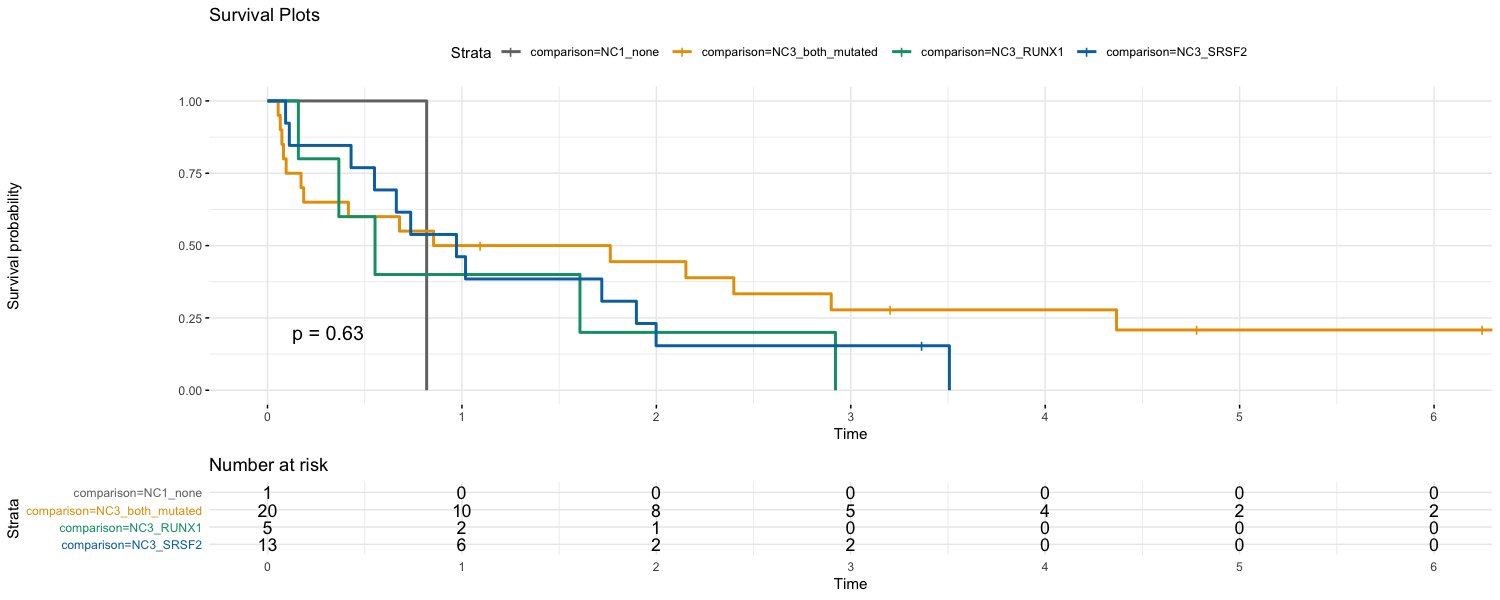

In [19]:
# Max proba component
data = df_w_splicing[df_w_splicing$final_component=="NC_splicing",]
surv1_object <- Surv(time = data$os, event = data$os_status)
fit2 <- survfit(surv1_object ~ init_predicted, data = data)
ggsurvplot(fit2, data = data, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(data$init_predicted))]))

# Second max proba component
data = df_w_splicing[df_w_splicing$final_component=="NC_splicing",]
surv1_object <- Surv(time = data$os, event = data$os_status)
fit2 <- survfit(surv1_object ~ second_predicted, data = data)
ggsurvplot(fit2, data = data, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(data$second_predicted))]))

#RUNX1 and SRSF2 Mutations
data = df_w_splicing[df_w_splicing$final_component=="NC_splicing",]
data$comparison <- ifelse(data$final_component == "NC_splicing" & data$SRSF2==1 & data$RUNX1==1,"NC_splicing_both_mutated",
                   ifelse(data$final_component == "NC_splicing" & data$SRSF2==1 & data$RUNX1==0,"NC_splicing_SRSF2",
                   ifelse(data$final_component == "NC_splicing" & data$SRSF2==0 & data$RUNX1==1,"NC_splicing_RUNX1","NC_splicing_none")))

surv1_object <- Surv(time = data$os, event = data$os_status)
fit2 <- survfit(surv1_object ~ comparison, data = data)
ggsurvplot(fit2, data = data, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(data$comparison))]))

data = df_w_splicing[df_w_splicing$final_component=="NC1",]
data$comparison <- ifelse(data$final_component == "NC1" & data$SRSF2==1 & data$RUNX1==1,"NC1_both_mutated",
                   ifelse(data$final_component == "NC1" & data$SRSF2==1 & data$RUNX1==0,"NC1_SRSF2",
                   ifelse(data$final_component == "NC1" & data$SRSF2==0 & data$RUNX1==1,"NC1_RUNX1","NC1_none")))

surv1_object <- Surv(time = data$os, event = data$os_status)
fit2 <- survfit(surv1_object ~ comparison, data = data)
ggsurvplot(fit2, data = data, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(data$comparison))]))

data = df_w_splicing[df_w_splicing$final_component=="NC2",]
data$comparison <- ifelse(data$final_component == "NC2" & data$SRSF2==1 & data$RUNX1==1,"NC2_both_mutated",
                   ifelse(data$final_component == "NC2" & data$SRSF2==1 & data$RUNX1==0,"NC2_SRSF2",
                   ifelse(data$final_component == "NC2" & data$SRSF2==0 & data$RUNX1==1,"NC2_RUNX1","NC1_none")))

surv1_object <- Surv(time = data$os, event = data$os_status)
fit2 <- survfit(surv1_object ~ comparison, data = data)
ggsurvplot(fit2, data = data, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(data$comparison))]))

data = df_w_splicing[df_w_splicing$final_component=="NC3",]
data$comparison <- ifelse(data$final_component == "NC3" & data$SRSF2==1 & data$RUNX1==1,"NC3_both_mutated",
                   ifelse(data$final_component == "NC3" & data$SRSF2==1 & data$RUNX1==0,"NC3_SRSF2",
                   ifelse(data$final_component == "NC3" & data$SRSF2==0 & data$RUNX1==1,"NC3_RUNX1","NC1_none")))

surv1_object <- Surv(time = data$os, event = data$os_status)
fit2 <- survfit(surv1_object ~ comparison, data = data)
ggsurvplot(fit2, data = data, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(data$comparison))]))

In [20]:
colnames(second_proba)

[1] "init_predicted"   "second_predicted" "init_proba"       "second_proba"

Numer of patients in this component :  196 
Table with the most frequent features for this component in decreasing order : 
   category NC_splicing
66    RUNX1          89
20   DNMT3A          53
75    SRSF2          51
79     TET2          40


Numer of patients in this component :  201 
Table with the most frequent features for this component in decreasing order : 
        category NC1
75         SRSF2 129
79          TET2 107
1          ASXL1 102
66         RUNX1  88
76         STAG2  88
54 NRAS_p.G12_13  43


Numer of patients in this component :  118 
Table with the most frequent features for this component in decreasing order : 
   category NC2
25      ITD  73
66    RUNX1  62
46      MLL  57
81    U2AF1  49
20   DNMT3A  43
6      BCOR  32


Numer of patients in this component :  39 
Table with the most frequent features for this component in decreasing order : 
      category NC3
75       SRSF2  33
66       RUNX1  25
20      DNMT3A  21
86      add_13  15
32        IDH1  12
33 IDH

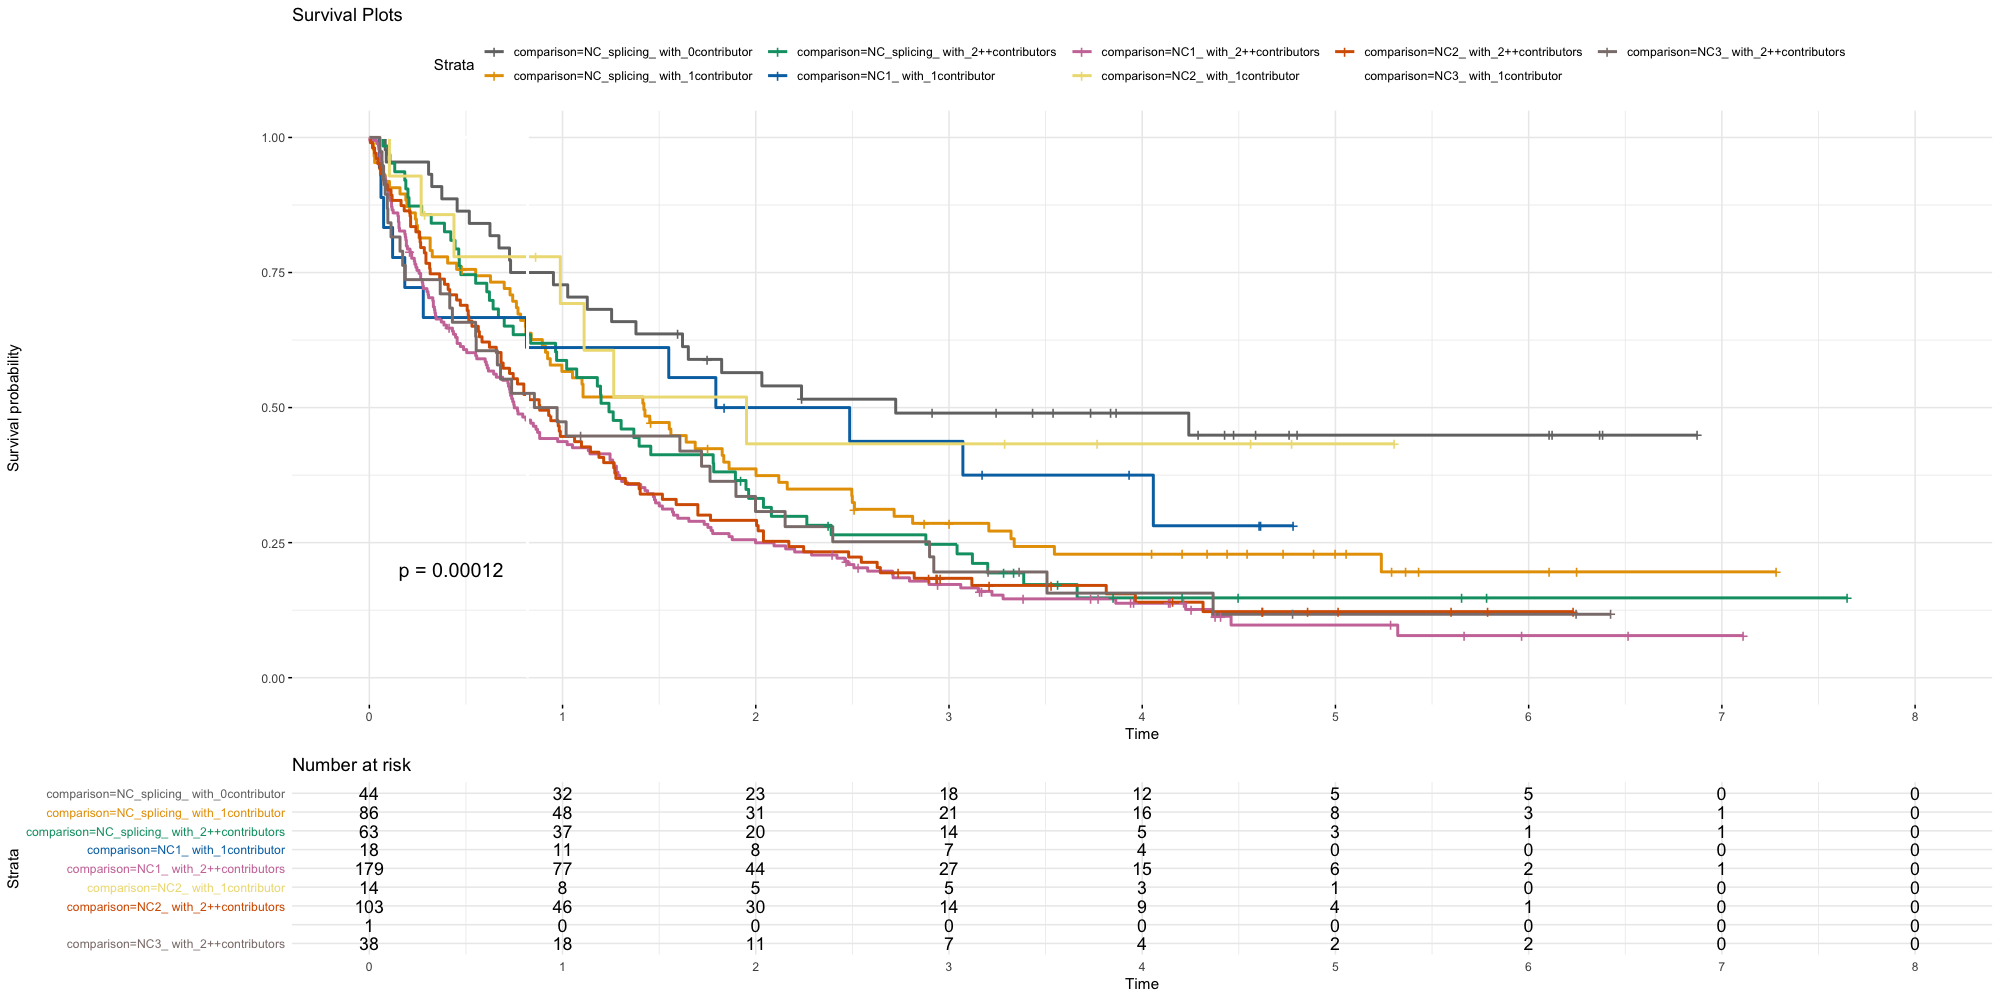

In [21]:
tmp1<-main_contributors_analysis("NC_splicing",plot='no')
tmp1$comparison <- paste("NC_splicing_",tmp1$comparison)
tmp2<-main_contributors_analysis("NC1",plot='no')
tmp2$comparison <- paste("NC1_",tmp2$comparison)
tmp3<-main_contributors_analysis("NC2",plot='no')
tmp3$comparison <- paste("NC2_",tmp3$comparison)
tmp4<-main_contributors_analysis("NC3",plot='no')
tmp4$comparison <- paste("NC3_",tmp4$comparison)
#tmp5<-main_contributors_analysis("NC6",plot='no')
#tmp5$comparison <- paste("NC6_",tmp5$comparison)
tmp_analysis <- rbind(tmp1[tmp1$final_component=="NC_splicing",c("os","os_status","comparison")],tmp2[tmp2$final_component=="NC1",c("os","os_status","comparison")],
          tmp3[tmp3$final_component=="NC2",c("os","os_status","comparison")],tmp4[tmp4$final_component=="NC3",c("os","os_status","comparison")]         )
set_notebook_plot_size(20,10)
surv1_object <- Surv(time = tmp_analysis$os, event = tmp_analysis$os_status)
fit2 <- survfit(surv1_object ~ comparison, data = tmp_analysis)
ggsurvplot(fit2, data = tmp_analysis, pval = TRUE,risk.table = TRUE,ggtheme = theme_minimal(),
risk.table.y.text.col = T,risk.table.y.text = T,break.time.by = 1,title= "Survival Plots",palette=as.vector(val1[1:length(unique(tmp_analysis$comparison))]))


In [22]:
### ELN and component

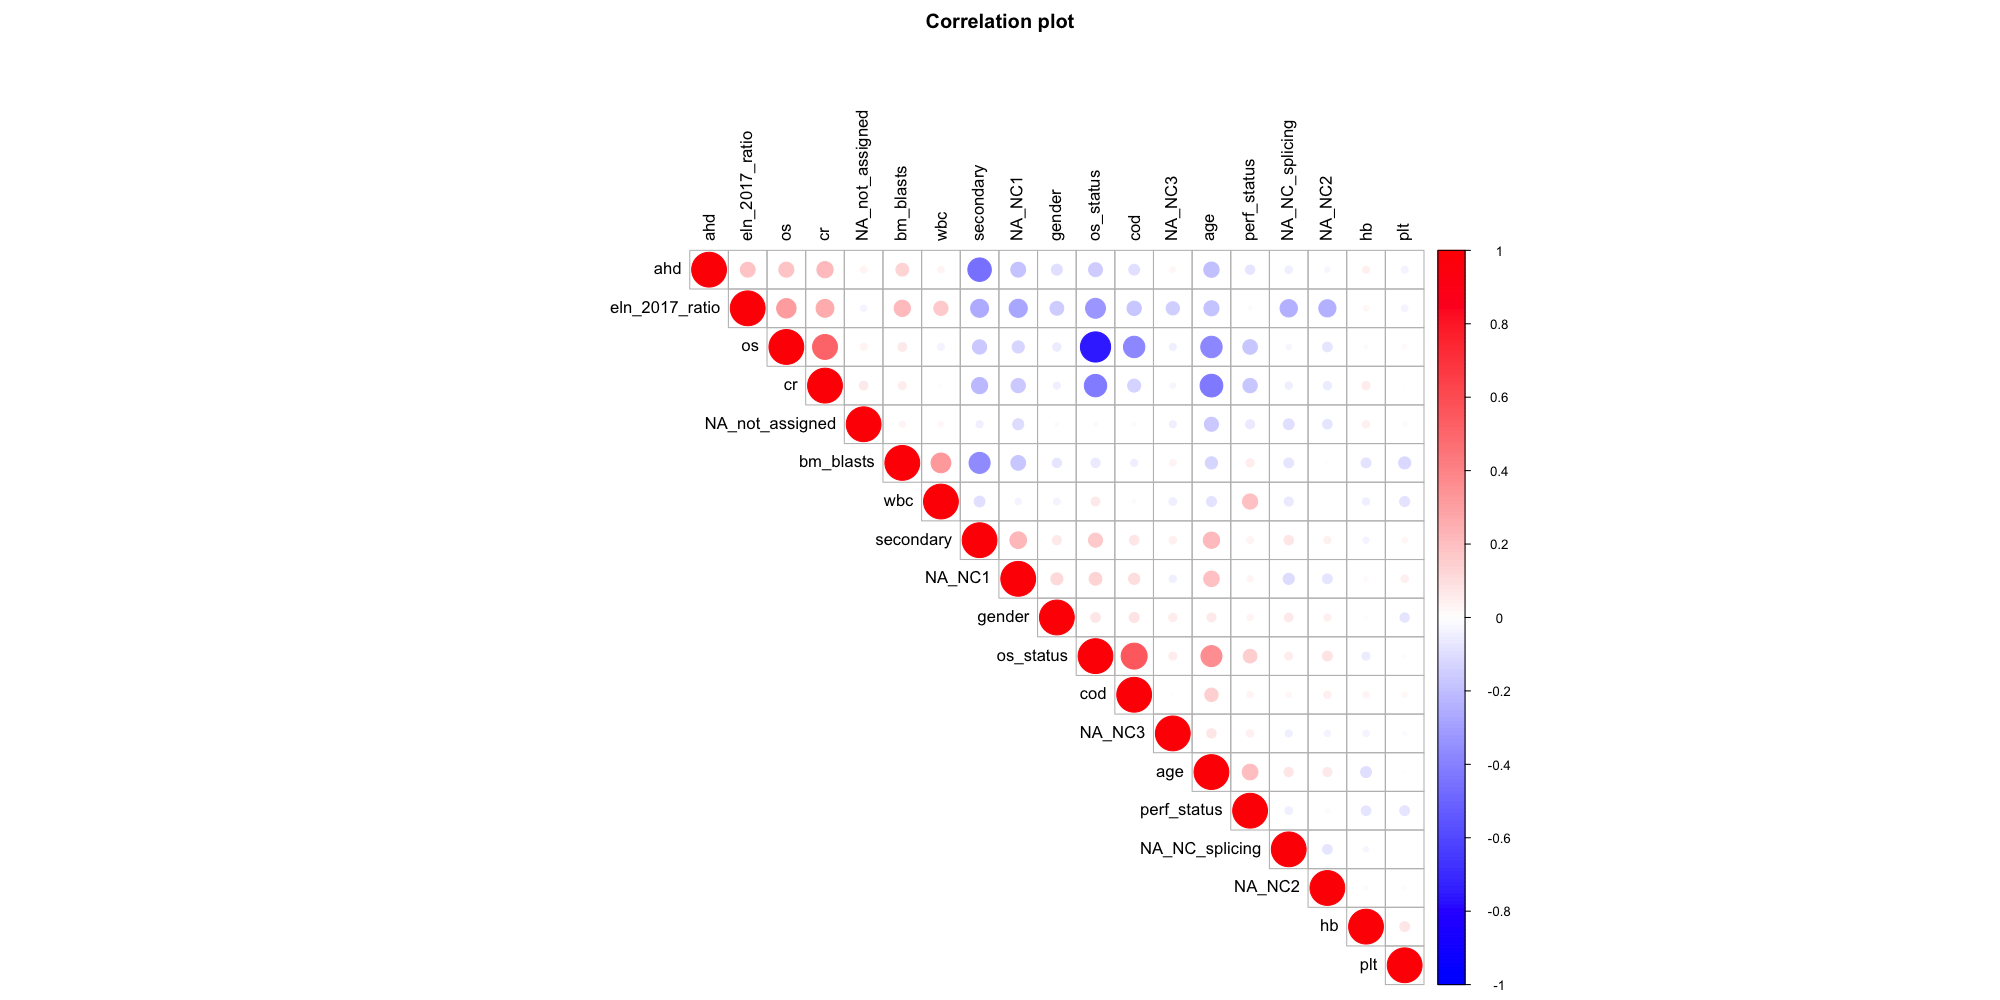

In [49]:
df_all_components <- read.table("../../../data/updated_dataset/refined_components_updated.tsv",sep = '\t' , header = T)
df_initial <- read.table("../../../data/initial_dataset/Master_04_10_2019.csv",sep = ',' , header = T)
rownames(df_initial) <- df_initial$data_pd
df_initial <- df_initial[,-1:-4]
df_eln <- read.table("../../../data/updated_dataset/eln_ratio.tsv",sep = '\t' , header = T)
rownames(df_eln) <- df_eln$X
df_eln <- df_eln[-1]
df <- merge(df_eln,df_all_components,by=0)
rownames(df) <- df$Row.names
df <- df[-1]
df <- merge(df,df_initial[,correlates],by=0)
rownames(df) <- df$Row.names
df <- df[-1]
df <- na.omit(df)
df <- df[df$os>0,]
df$eln_2017_ratio <- ifelse(df$eln_2017_ratio=="adverse",1,
                     ifelse(df$eln_2017_ratio=="intermediate",2,3))
df <- cbind(df, dummy(df$final_component, sep = "_"))
corrplot(rcorr(as.matrix(df[,c("eln_2017_ratio",correlates,"NA_NC1","NA_NC2","NA_NC3","NA_NC_splicing","NA_not_assigned")]))$r,type="upper", order = "hclust", 
         tl.col = "black",col=colorRampPalette(c("blue","white","red"))(200),mar=c(0,0,2,0),title="Correlation plot")

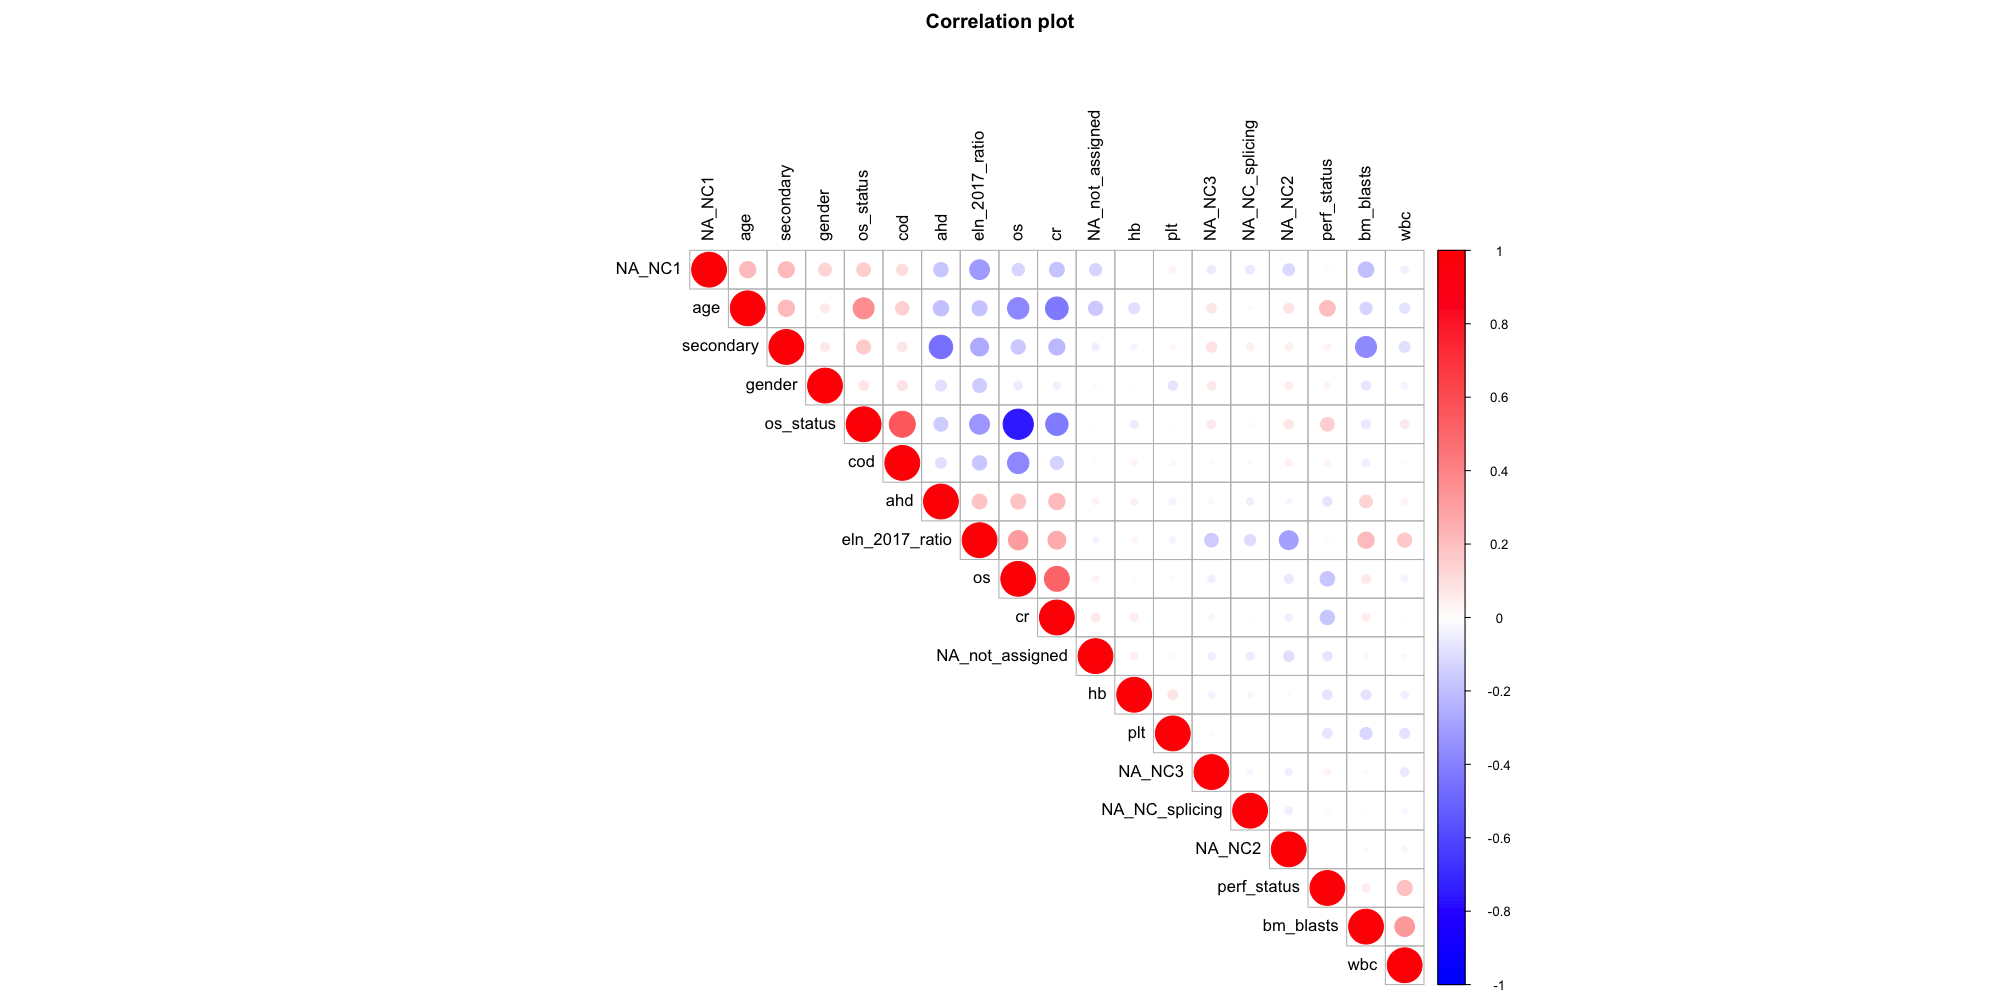

In [50]:
df_all_components_elli <- read.table("../../../data/updated_dataset/elli_refined_components_updated.tsv",sep = '\t' , header = T)
df1 <- merge(df_eln,df_all_components_elli,by=0)
rownames(df1) <- df1$Row.names
df1 <- df1[-1]
df1 <- merge(df1,df_initial[,correlates],by=0)
rownames(df1) <- df1$Row.names
df1 <- df1[-1]
df1 <- na.omit(df1)
df1 <- df1[df1$os>0,]
df1$eln_2017_ratio <- ifelse(df1$eln_2017_ratio=="adverse",1,
                     ifelse(df1$eln_2017_ratio=="intermediate",2,3))
df1 <- cbind(df1, dummy(df1$final_component, sep = "_"))
corrplot(rcorr(as.matrix(df1[,c("eln_2017_ratio",correlates,"NA_NC1","NA_NC2","NA_NC3","NA_NC_splicing","NA_not_assigned")]))$r,type="upper", order = "hclust", 
         tl.col = "black",col=colorRampPalette(c("blue","white","red"))(200),mar=c(0,0,2,0),title="Correlation plot")

In [55]:
rcorr(as.matrix(df1[,c("eln_2017_ratio","NA_NC1","NA_NC2","NA_NC3","NA_NC_splicing","NA_not_assigned")]))
rcorr(as.matrix(df[,c("eln_2017_ratio","NA_NC1","NA_NC2","NA_NC3","NA_NC_splicing","NA_not_assigned")]))

                eln_2017_ratio NA_NC1 NA_NC2 NA_NC3 NA_NC_splicing
eln_2017_ratio            1.00  -0.32  -0.29  -0.15          -0.11
NA_NC1                   -0.32   1.00  -0.11  -0.06          -0.06
NA_NC2                   -0.29  -0.11   1.00  -0.04          -0.05
NA_NC3                   -0.15  -0.06  -0.04   1.00          -0.02
NA_NC_splicing           -0.11  -0.06  -0.05  -0.02           1.00
NA_not_assigned          -0.03  -0.12  -0.09  -0.05          -0.05
                NA_not_assigned
eln_2017_ratio            -0.03
NA_NC1                    -0.12
NA_NC2                    -0.09
NA_NC3                    -0.05
NA_NC_splicing            -0.05
NA_not_assigned            1.00

n= 1931 


P
                eln_2017_ratio NA_NC1 NA_NC2 NA_NC3 NA_NC_splicing
eln_2017_ratio                 0.0000 0.0000 0.0000 0.0000        
NA_NC1          0.0000                0.0000 0.0095 0.0061        
NA_NC2          0.0000         0.0000        0.0535 0.0410        
NA_NC3          0.0000   

                eln_2017_ratio NA_NC1 NA_NC2 NA_NC3 NA_NC_splicing
eln_2017_ratio            1.00  -0.27  -0.24  -0.15          -0.25
NA_NC1                   -0.27   1.00  -0.08  -0.04          -0.10
NA_NC2                   -0.24  -0.08   1.00  -0.03          -0.08
NA_NC3                   -0.15  -0.04  -0.03   1.00          -0.04
NA_NC_splicing           -0.25  -0.10  -0.08  -0.04           1.00
NA_not_assigned          -0.03  -0.10  -0.08  -0.04          -0.10
                NA_not_assigned
eln_2017_ratio            -0.03
NA_NC1                    -0.10
NA_NC2                    -0.08
NA_NC3                    -0.04
NA_NC_splicing            -0.10
NA_not_assigned            1.00

n= 1931 


P
                eln_2017_ratio NA_NC1 NA_NC2 NA_NC3 NA_NC_splicing
eln_2017_ratio                 0.0000 0.0000 0.0000 0.0000        
NA_NC1          0.0000                0.0004 0.0548 0.0000        
NA_NC2          0.0000         0.0004        0.1503 0.0007        
NA_NC3          0.0000   

In [56]:
dim(df)

[1] 1931  197